# Prototype Fer


In [5]:
# Model design
import agentpy as ap
import numpy as np

# Visualization
import matplotlib.pyplot as plt 
import IPython

# Utility
import random

## Agents


In [6]:
class Harvester(ap.Agent):
    def setup(self):
        # Initialize properties
        self.location = self.p.location
        self.max_fuel = self.p.max_fuel
        self.fuel_level = self.p.fuel_level
        self.max_storage = self.p.max_storage
        self.harvest_level = self.p.harvest_level
        self.distance_traveled = self.p.distance_traveled

    def step(self):
        # Define the step logic
        pass

class Container(ap.Agent):
    def setup(self):
        # Initialize properties
        self.location = self.p.location
        self.max_fuel = self.p.max_fuel
        self.fuel_level = self.p.fuel_level
        self.max_storage = self.p.max_storage
        self.harvest_level = self.p.harvest_level
        self.distance_traveled = self.p.distance_traveled
        self.unloading_time = self.p.unloading_time
        self.closest_silo = self.p.closest_silo
        self.harvester_pair = self.p.harvester_pair

    def step(self):
        # Define the step logic
        pass

class Plot(ap.Agent):
    def setup(self):
        # Initialize properties
        self.location = self.p.location
        self.harvest_maturity = self.p.harvest_maturity
        self.direction_angle = self.p.direction_angle

    def step(self):
        # Define the step logic
        pass

class Silo(ap.Agent):
    def setup(self):
        # Initialize properties
        self.location = self.p.location
        self.max_storage = self.p.max_storage
        self.harvest_level = self.p.harvest_level

    def step(self):
        # Define the step logic
        pass

## Model


In [11]:

class Farm(ap.Model):
    def setup(self):
        # Initialize properties
        self.length = self.p.length
        self.altitude = self.p.altitude
        self.steps = self.p.steps

        # Create agents
        self.harvesters = ap.AgentList(self, self.p.harvesters, Harvester)
        self.containers = ap.AgentList(self, self.p.containers, Container)
        self.plots = ap.AgentList(self, self.p.plots, Plot)
        self.silos = ap.AgentList(self, self.p.silos, Silo)

        # Define the environment
        self.space = ap.Space(self, shape=(self.length, self.altitude))

        # Assign agents to positions with custom logic
        self.assign_custom_positions()

        # Initialize visualization
        self.visualization = ap.Visualization(self)
        self.visualization.add_layer(self.harvesters, color="green")
        self.visualization.add_layer(self.containers, color="red")
        self.visualization.add_layer(self.silos, color="yellow")
        self.visualization.add_layer(self.plots, color="white")

    def assign_custom_positions(self):
        # Custom logic for positioning harvesters and containers
        harvester_positions = self.get_furthest_positions(self.p.harvesters)
        for i, agent in enumerate(self.harvesters):
            self.space.place_agent(agent, harvester_positions[i])
            # Place container next to the harvester
            container_position = self.get_adjacent_position(harvester_positions[i])
            self.space.place_agent(self.containers[i], container_position)

        # Custom logic for positioning plots
        for x in range(self.length):
            for y in range(self.altitude):
                self.space.place_agent(self.plots[x * self.altitude + y], (x, y))

        # Custom logic for positioning silos
        silo_positions = self.get_random_contour_positions(self.p.silos, harvester_positions)
        for i, agent in enumerate(self.silos):
            self.space.place_agent(agent, silo_positions[i])

    def get_furthest_positions(self, n):
        """
        Generate positions as far apart as possible for n agents,
        considering the adjacent position for containers.
        """
        positions = []
        step = max(self.length, self.altitude) // (n + 1)
        
        for i in range(n):
            x = (i * step) % self.length
            y = (i * step // self.length * step) % self.altitude
            
            # Adjust positions to ensure containers fit within the space
            if x == 0:
                x += 1
            elif x == self.length - 1:
                x -= 1
            if y == 0:
                y += 1
            elif y == self.altitude - 1:
                y -= 1
            
            positions.append((x, y))
        
        return positions

    def get_adjacent_position(self, position):
        """
        Get the position adjacent to the given position, prioritizing the right side.
        """
        x, y = position
        if x + 1 < self.length:
            return (x + 1, y)
        elif x - 1 >= 0:
            return (x - 1, y)
        elif y + 1 < self.altitude:
            return (x, y + 1)
        elif y - 1 >= 0:
            return (x, y - 1)
        return position

    def get_random_contour_positions(self, n, exclude_positions):
        positions = []
        while len(positions) < n:
            if random.choice([True, False]):
                x = random.choice([0, self.length - 1])
                y = random.randint(0, self.altitude - 1)
            else:
                y = random.choice([0, self.altitude - 1])
                x = random.randint(0, self.length - 1)
            if (x, y) not in exclude_positions and (x, y) not in positions:
                positions.append((x, y))
        return positions

    def step(self):
        # Define the step logic
        self.harvesters.step()
        self.containers.step()
        self.plots.step()
        self.silos.step()

    def update(self):
        # Update visualization
        self.visualization.update()

    def end(self):
        # Define the end logic
        pass

## Parameters


In [12]:
parameters = {
    # General properties
    'length': 100,  # Length of the plane
    'altitude': 100,  # Altitude of the plane
    'steps': 1000,  # Number of steps in the simulation

    # Harvester properties
    'harvesters': 10,  # Number of Harvester agents
    'max_fuel': 100,
    'fuel_level': 50,
    'max_storage': 200,
    'harvest_level': 0,
    'distance_traveled': 0,

    # Container properties
    'containers': 5,  # Number of Container agents
    'unloading_time': 10,
    'closest_silo': None,
    'harvester_pair': None,

    # Plot properties
    'plots': 20,  # Number of Plot agents
    'harvest_maturity': 0,
    'direction_angle': 0,

    # Silo properties
    'silos': 2,  # Number of Silo agents
    'max_storage': 200,
    'harvest_level': 0
}

## Simulation


AttributeError: location

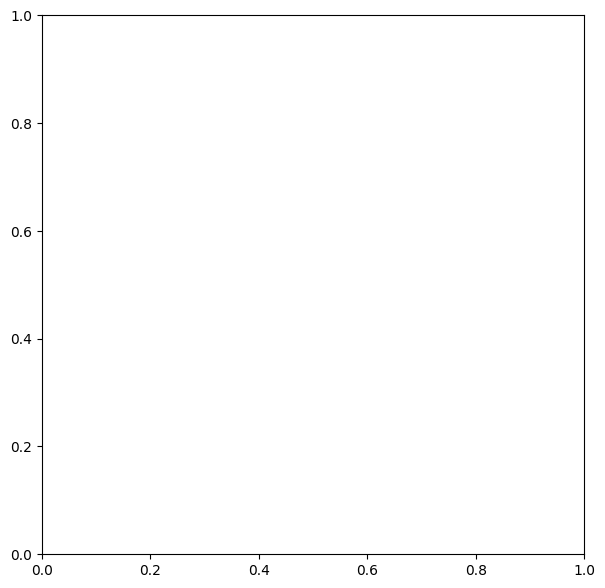

In [13]:
# Create the model
model = Farm(parameters)

# Run the animation
def animation_plot_single(m, ax):
    ax.set_title(f"Farm Model t={m.t}")
    pos = m.space.positions.values()
    pos = np.array(list(pos)).T  # Transform
    ax.scatter(*pos, s=10, c='black')
    ax.set_xlim(0, m.p.length)
    ax.set_ylim(0, m.p.altitude)
    ax.set_axis_off()

def animation_plot(m, p):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111)
    animation = ap.animate(m(p), fig, ax, animation_plot_single)
    return IPython.display.HTML(animation.to_jshtml(fps=20))

# Display the animation
animation_plot(Farm, parameters)